In [1]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.3 MB/s eta 0:00:00


In [2]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load Dataset

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
cols = ["Class","Alcohol","Malic_acid","Ash","Alcalinity_of_ash","Magnesium",
        "Total_phenols","Flavanoids","Nonflavanoid_phenols","Proanthocyanins",
        "Color_intensity","Hue","OD280_OD315","Proline"]

df = pd.read_csv(url, header=None, names=cols)
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280_OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [11]:
df.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
df.isnull().sum()

,0
Class,0
Alcohol,0
Malic_acid,0
Ash,0
Alcalinity_of_ash,0
Magnesium,0
Total_phenols,0
Flavanoids,0
Nonflavanoid_phenols,0
Proanthocyanins,0


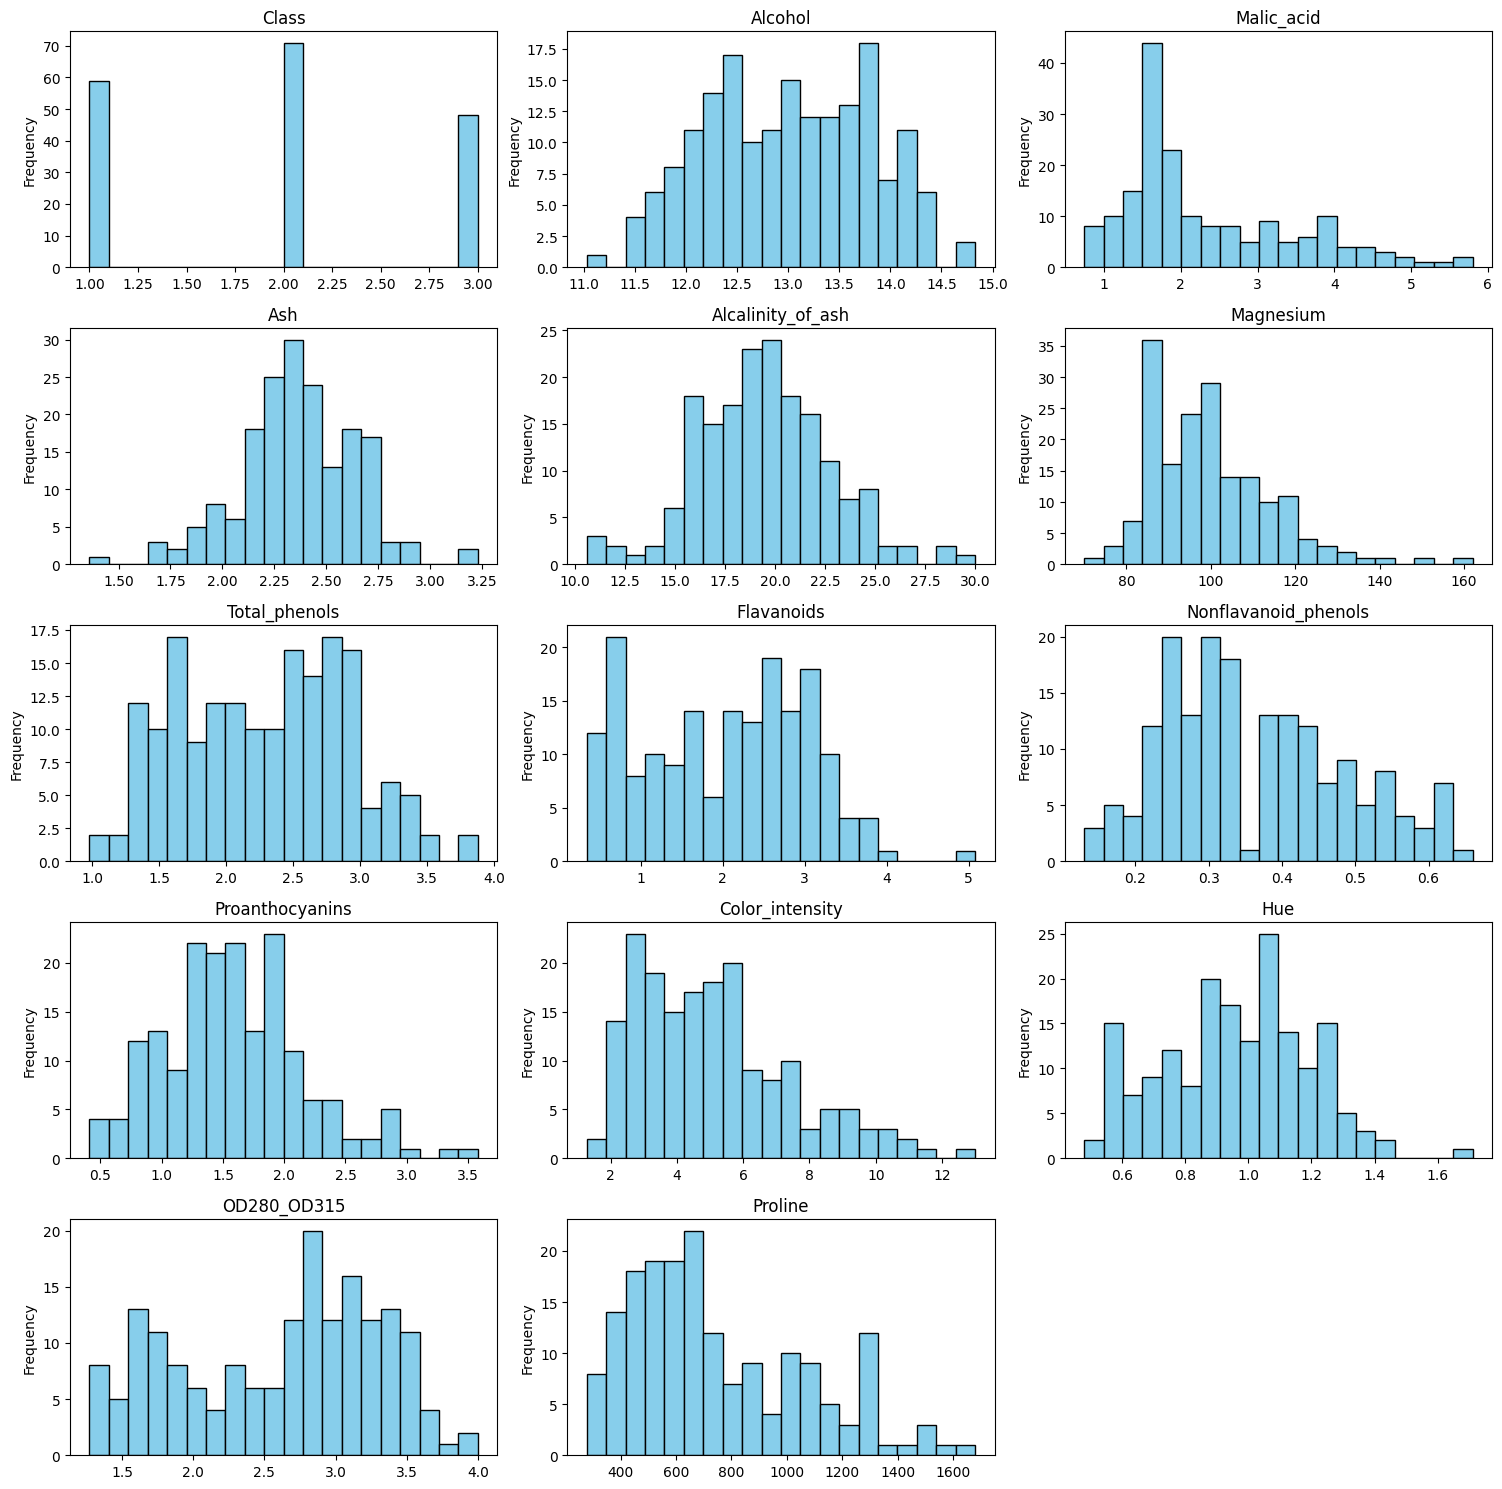

In [19]:
cols = df.columns

fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_ylabel("Frequency")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Features & Target

In [21]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [22]:
df['Class'].value_counts()

,count
Class,
2,71
1,59
3,48


## Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale Features

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Models

In [26]:
logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [27]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)  # doesn't need scaling

DecisionTreeClassifier(random_state=42)

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

## Streamlit UI

In [31]:
st.set_page_config(page_title="🍷 Wine Classifier", layout="wide")
st.title("🍷 Wine Classification App")
st.markdown("Choose a model to classify wines into **3 classes** based on chemical features.")

2025-10-03 10:43:37.343 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:43:37.345 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:43:37.345 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:43:37.346 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:43:37.347 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:43:37.349 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:43:37.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

## Sidebar Model Selector

In [32]:
model_choice = st.sidebar.selectbox(
    "🔀 Choose Model",
    ("Logistic Regression", "Decision Tree", "KNN")
)

2025-10-03 10:43:40.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:43:40.441 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:43:40.443 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:43:40.444 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:43:40.446 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:43:40.447 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:43:40.448 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


## Pick Model

In [33]:
if model_choice == "Logistic Regression":
    model = logistic_model
    X_used, X_used_test = X_train_scaled, X_test_scaled
elif model_choice == "Decision Tree":
    model = decision_tree_model
    X_used, X_used_test = X_train, X_test
else:
    model = knn_model
    X_used, X_used_test = X_train_scaled, X_test_scaled

## Model Performance

In [37]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

st.header("📊 Model Performance")

y_pred = model.predict(X_used_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

col1, col2 = st.columns(2)
col1.metric("Accuracy", f"{acc:.2f}")
col2.metric("F1 Score", f"{f1:.2f}")

st.subheader("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y), ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
st.pyplot(fig)


2025-10-03 10:48:19.772 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:48:19.775 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:48:19.776 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:48:19.821 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:48:19.836 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:48:19.840 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:48:19.847 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:48:19.855 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

## User Input for Prediction

In [39]:
st.header("🧪 Try It Yourself")
st.markdown("Adjust the sliders below to classify a new wine sample:")

# Create sliders in 2 columns for better layout
cols = st.columns(2)
user_input = []

for i, col_name in enumerate(X.columns):
    with cols[i % 2]:  # alternate sliders between two columns
        val = st.slider(
            label=col_name,
            min_value=float(X[col_name].min()),
            max_value=float(X[col_name].max()),
            value=float(X[col_name].mean())
        )
        user_input.append(val)

user_input = np.array(user_input).reshape(1, -1)

# Scale if needed
if model_choice in ["Logistic Regression", "KNN"]:
    user_input = scaler.transform(user_input)

# Predict button
if st.button("🚀 Predict Class"):
    prediction = model.predict(user_input)[0]
    probas = model.predict_proba(user_input)[0]

    st.success(f"🎯 Predicted Wine Class: **{prediction}**")
    st.write("📊 Prediction Probabilities:")
    for idx, prob in enumerate(probas):
        st.write(f"- Class {idx}: {prob:.2f}")

2025-10-03 10:50:02.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:50:02.387 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:50:02.388 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:50:02.394 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:50:02.401 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:50:02.404 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:50:02.412 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 10:50:02.417 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar